In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('all-data.csv')

Drive already mounted at all-data.csv; to attempt to forcibly remount, call drive.mount("all-data.csv", force_remount=True).


In [ ]:
file="/all-data.csv"

# Detect encoding
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
data=pd.read_csv(file,encoding='Windows-1252',header=None)

In [ ]:
data.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
data1=data.rename(columns={1:'sentence',0:'sentiment'},inplace=True)




In [ ]:
data.head()

,sentiment,sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
data.describe()

,sentiment,sentence
count,4846,4846
unique,3,4838
top,neutral,Proha Plc ( Euronext :7327 ) announced today (...
freq,2879,2


# using the TF-IDF algorithm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
analyze = vectorizer.build_analyzer()

In [ ]:
x = vectorizer.fit_transform(data['sentence'])

In [ ]:
vectorizer.get_feature_names()

['00',
 '000',
 '000063',
 '002',
 '0025',
 '003',
 '0030',
 '007',
 '008',
 '01',
 '0101138',
 '012',
 '0187274',
 '019',
 '02',
 '023',
 '027',
 '029',
 '03',
 '030',
 '031',
 '035',
 '04',
 '045',
 '046',
 '047',
 '0491',
 '05',
 '050',
 '052',
 '06',
 '060',
 '063',
 '064',
 '067',
 '07',
 '070',
 '0711',
 '0762',
 '08',
 '083',
 '084',
 '087',
 '089',
 '09',
 '094',
 '0941',
 '097',
 '10',
 '100',
 '1000',
 '100mn',
 '101',
 '102',
 '1023',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109mn',
 '10mn',
 '10th',
 '11',
 '110',
 '111',
 '1112',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '117mn',
 '118',
 '119',
 '11m',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '123',
 '124',
 '125',
 '127',
 '128',
 '129',
 '12mp',
 '12th',
 '13',
 '130',
 '131',
 '131000',
 '132',
 '133',
 '134',
 '135',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '1411',
 '141mn',
 '142',
 '143',
 '145',
 '146',
 '146mn',
 '147',
 '148',
 '149',
 '14mn',
 '15',
 '150',
 '150mn',
 '151',
 '152',
 '154'

In [ ]:
df = pd.DataFrame(x.toarray(),columns = vectorizer.get_feature_names() )

In [ ]:
df.head()

,00,000,000063,002,0025,003,0030,007,008,01,0101138,012,0187274,019,02,023,027,029,03,030,031,035,04,045,046,047,0491,05,050,052,06,060,063,064,067,07,070,0711,0762,08,...,zandvliet,zao,zapadnye,zealand,zepro,zero,zgody,zinc,zip,zloty,zoltan,zone,zoo,zte,zu,æhikauppa,æhivakuutus,æinen,æjoki,ækel,æki,æl,æliitto,ælt,æmeri,æn,ænekoski,ænen,ænge,ænnen,ænsi,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.147059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['sentiment']=data['sentiment']

In [ ]:
df.head()

,00,000,000063,002,0025,003,0030,007,008,01,0101138,012,0187274,019,02,023,027,029,03,030,031,035,04,045,046,047,0491,05,050,052,06,060,063,064,067,07,070,0711,0762,08,...,zao,zapadnye,zealand,zepro,zero,zgody,zinc,zip,zloty,zoltan,zone,zoo,zte,zu,æhikauppa,æhivakuutus,æinen,æjoki,ækel,æki,æl,æliitto,ælt,æmeri,æn,ænekoski,ænen,ænge,ænnen,ænsi,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,sentiment
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
1,0.0,0.147059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [ ]:
df['sentiment']=df['sentiment'].map({'neutral':0,'positive':1,'negative':-1})

In [ ]:
X=df.drop(['sentiment'],axis=1).values

In [ ]:
y=df['sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:

A= df.copy()

A = pd.get_dummies(A, columns=['sentiment'], prefix = ['sentiment'])

print(A.head())

    00       000  000063  002  ...  ˆeur  sentiment_-1  sentiment_0  sentiment_1
0  0.0  0.000000     0.0  0.0  ...   0.0             0            1            0
1  0.0  0.147059     0.0  0.0  ...   0.0             0            1            0
2  0.0  0.000000     0.0  0.0  ...   0.0             1            0            0
3  0.0  0.000000     0.0  0.0  ...   0.0             0            0            1
4  0.0  0.000000     0.0  0.0  ...   0.0             0            0            1

[5 rows x 10074 columns]


In [ ]:
df1 = pd.DataFrame(A)

# Implementing label encoder and one hot encoding and ANN

In [ ]:
all_inputs = X

In [ ]:
all_labels = df['sentiment'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [ ]:
encoder = LabelEncoder()
encoder.fit(all_labels)
encoded_Y = encoder.transform(all_labels)

dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(all_inputs,dummy_y, test_size=0.1, random_state=101)

In [ ]:
train_x = np.asarray(X_train_encoded)
train_y = np.asarray(y_train_encoded)
validation_x = np.asarray(X_test_encoded)
validation_y = np.asarray(y_test_encoded)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_x,train_y, epochs=30)

Epoch 1/30
137/137 [==============================] - 1s 5ms/step - loss: 0.9675 - accuracy: 0.6219
Epoch 2/30
137/137 [==============================] - 1s 6ms/step - loss: 0.5988 - accuracy: 0.7471
Epoch 3/30
137/137 [==============================] - 1s 6ms/step - loss: 0.3255 - accuracy: 0.8828
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 0.1471 - accuracy: 0.9661
Epoch 5/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0689 - accuracy: 0.9849
Epoch 6/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0386 - accuracy: 0.9915
Epoch 7/30
137/137 [==============================] - 1s 6ms/step - loss: 0.0245 - accuracy: 0.9938
Epoch 8/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0191 - accuracy: 0.9956
Epoch 9/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 10/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.9966

In [ ]:
pred_train = model.predict(train_x)
scores = model.evaluate(train_x, train_y, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(validation_x)
scores2 = model.evaluate(validation_x, validation_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))   

Accuracy on training data: 0.9988534450531006 
 Error on training data: 0.001146554946899414
Accuracy on test data: 0.7195876240730286 
 Error on test data: 0.28041237592697144


In [ ]:
encoded_Y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
all_labels

array([ 0,  0, -1, ..., -1, -1, -1])

In [ ]:
X_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dummy_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# XGBOOSTER

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.73%


# RANDOMFOREST


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred1 = regressor.predict(X_test)

In [ ]:
y_pred1


array([0. , 0.9, 0.2, ..., 0. , 0. , 1. ])

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
 print(accuracy_score(test_preds,y_test)*100)

73.72764786795048


# LSTM MODEL IMPLEMENTATION


In [ ]:
import tensorflow as tf


In [ ]:
model_lstm = Sequential()
model_lstm.add(tf.keras.layers.LSTM(32,return_sequences=True, input_shape=(1,train_x.shape[1])))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(all_inputs,dummy_y, test_size=0.1, random_state=101)

In [ ]:
train_x = np.asarray(X_train_encoded)
train_y = np.asarray(y_train_encoded)
validation_x = np.asarray(X_test_encoded)
validation_y = np.asarray(y_test_encoded)
#X_train_dim = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))


In [ ]:
X_train_lstm = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))

In [ ]:
y_train_lstm = np.reshape(train_y, (train_y.shape[0], 1, train_y.shape[1]))

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             1293312   
_________________________________________________________________
dense_4 (Dense)              (None, 1, 3)              99        
Total params: 1,293,411
Trainable params: 1,293,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.fit(X_train_lstm,y_train_lstm, epochs=20)

Epoch 1/20
137/137 [==============================] - 3s 12ms/step - loss: 0.9749 - accuracy: 0.5971
Epoch 2/20
137/137 [==============================] - 2s 11ms/step - loss: 0.7647 - accuracy: 0.6471
Epoch 3/20
137/137 [==============================] - 2s 12ms/step - loss: 0.5968 - accuracy: 0.7308
Epoch 4/20
137/137 [==============================] - 2s 11ms/step - loss: 0.4368 - accuracy: 0.8360
Epoch 5/20
137/137 [==============================] - 2s 11ms/step - loss: 0.3020 - accuracy: 0.9069
Epoch 6/20
137/137 [==============================] - 2s 12ms/step - loss: 0.2035 - accuracy: 0.9518
Epoch 7/20
137/137 [==============================] - 2s 11ms/step - loss: 0.1402 - accuracy: 0.9739
Epoch 8/20
137/137 [==============================] - 2s 12ms/step - loss: 0.0995 - accuracy: 0.9821
Epoch 9/20
137/137 [==============================] - 2s 11ms/step - loss: 0.0732 - accuracy: 0.9867
Epoch 10/20
137/137 [==============================] - 2s 12ms/step - loss: 0.0552 - accura

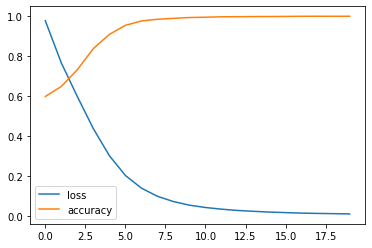

In [ ]:
pd.DataFrame(model_lstm.history.history).plot()

In [ ]:
pred_train_lstm = model_lstm.predict(X_train_lstm)
scores = model_lstm.evaluate(X_train_lstm, y_train_lstm, verbose=0)

In [ ]:
X_test_lstm = np.reshape(validation_x, (validation_x.shape[0], 1, validation_x.shape[1]))
y_test_lstm = np.reshape(validation_y, (validation_y.shape[0], 1, validation_y.shape[1]))

In [ ]:
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   
 
pred_test_lstm= model_lstm.predict(X_test_lstm)
scores2 = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))   

Accuracy on training data: 99.86241459846497 
 Error on training data: 0.13758540153503418
Accuracy on test data: 74.02061820030212 
 Error on test data: 25.979381799697876


In [ ]:
pip install transformers


     |████████████████████████████████| 3.1 MB 8.0 MB/s 
     |████████████████████████████████| 895 kB 54.8 MB/s 
     |████████████████████████████████| 59 kB 7.2 MB/s 
     |████████████████████████████████| 3.3 MB 30.0 MB/s 
     |████████████████████████████████| 596 kB 62.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 231 kB 7.8 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 290 kB 55.1 MB/s 
     |████████████████████████████████| 1.7 MB 64.9 MB/s 
     |████████████████████████████████| 8.3 MB 13.8 MB/s 
     |████████████████████████████████| 1.2 MB 42.9 MB/s 
     |████████████████████████████████| 139 kB 61.2 MB/s 
     |████████████████████████████████| 180 kB 58.4 MB/s 
     |████████████████████████████████| 97 kB 8.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 53.1 MB/s 
     |████████████████████████████████| 243 kB 79.3 MB/s 
     |████████████████████████████████| 132 kB 55.4 MB/s 
     |████████████████████████████████| 192 kB 74.9 MB/s 
     |████████████████████████████████| 160 kB 79.0 MB/s 
     |████████████████████████████████| 271 kB 63.1 MB/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 
     |█████████████████

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()
model_args.train_batch_size = 2
model_args.gradient_accumulation_steps = 8
model_args.learning_rate = 3e-5
model_args.num_train_epochs = 1

model_bert = ClassificationModel("bert", "bert-base-uncased", num_labels=3, args=model_args, use_cuda=False)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
data.head(1)

,sentiment,sentence
0,neutral,"According to Gran , the company has no plans t..."


In [ ]:
result = pd.concat([data['sentence'], df['sentiment']], axis=1, join="inner")

In [ ]:
df['sentiment']=df['sentiment'].map({'neutral':0,'positive':1,'negative':2})

In [ ]:
result = pd.concat([data['sentence'], df['sentiment']], axis=1, join="inner")

In [ ]:
result.head()

,sentence,sentiment
0,"According to Gran , the company has no plans t...",NaN
1,Technopolis plans to develop in stages an area...,NaN
2,The international electronic industry company ...,NaN
3,With the new production plant the company woul...,NaN
4,According to the company 's updated strategy f...,NaN


In [ ]:
#data.head(1)

,sentiment,sentence
0,neutral,"According to Gran , the company has no plans t..."


In [ ]:
train_x_1 = result.sample(frac = 0.75, random_state = 42)
test_x_1 = pd.concat([df, train_x_1]).drop_duplicates(keep=False)

In [ ]:
print(train_x_1.shape)
print(test_x_1.shape)

(3634, 2)
(8446, 10073)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()
model_args.train_batch_size = 2
model_args.gradient_accumulation_steps = 8
model_args.learning_rate = 3e-5
model_args.num_train_epochs = 1

model_bert = ClassificationModel("bert", "bert-base-uncased", num_labels=3, args=model_args, use_cuda=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
model_bert.train_model(train_x_1)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3634 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1817 [00:00<?, ?it/s]

IndexError: ignored